# SUOX


Sulfite Oxidase Deficiency

Data from [Li JT, et al. Mutation analysis of SUOX in isolated sulfite oxidase deficiency with ectopia lentis as the presenting feature: insights into genotype-phenotype correlation](https://pubmed.ncbi.nlm.nih.gov/36303223/)

In [1]:
import hpotk
import genophenocorr

store = hpotk.configure_ontology_store()
hpo = store.load_minimal_hpo(release='v2023-10-09')
print(f'Loaded HPO v{hpo.version}')
print(f"Using genophenocorr version {genophenocorr.__version__}")

Loaded HPO v2023-10-09
Using genophenocorr version 0.1.1dev


### Setup

In [2]:
SUOX_transcript_id = 'NM_001032386.2'
SUOX_protein_id = "NP_001027558.1"

### Load Phenopackets

We will load phenopackets from the *SUOX* cohort of Phenopacket Store `0.1.18`.

In [3]:
from ppktstore.registry import configure_phenopacket_registry
from genophenocorr.preprocessing import configure_caching_cohort_creator, load_phenopackets

cohort_name = 'SUOX'
phenopacket_store_release = '0.1.18'

registry = configure_phenopacket_registry()
with registry.open_phenopacket_store(phenopacket_store_release) as ps:
    phenopackets = tuple(ps.iter_cohort_phenopackets(cohort_name))

cohort_creator = configure_caching_cohort_creator(hpo)
cohort, validation = load_phenopackets(
    phenopackets=phenopackets, 
    cohort_creator=cohort_creator,
)
del phenopackets
validation.summarize()

Patients Created: 100%|██████████| 35/35 [00:00<00:00, 335.92it/s]
Validated under none policy
No errors or warnings were found



In [4]:
from genophenocorr.view import CohortViewable
from IPython.display import HTML, display

viewer = CohortViewable(hpo)
display(HTML(viewer.process(cohort=cohort, transcript_id=SUOX_transcript_id)))

HPO Term,ID,Annotation Count
Seizure,HP:0001250,28
Hypotonia,HP:0001252,15
Sulfocysteinuria,HP:0032350,13
Abnormality of extrapyramidal motor function,HP:0002071,11
Hypertonia,HP:0001276,11
Microcephaly,HP:0000252,10
Hypohomocysteinemia,HP:0020222,10
Neurodevelopmental delay,HP:0012758,8
Ectopia lentis,HP:0001083,7
Hypocystinemia,HP:0500152,7


In [5]:
from genophenocorr.model.genome import GRCh38
from genophenocorr.preprocessing import configure_protein_metadata_service, VVMultiCoordinateService

txc_service = VVMultiCoordinateService(genome_build=GRCh38)
tx_coordinates = txc_service.fetch(SUOX_transcript_id) 

pms = configure_protein_metadata_service()
protein_meta = pms.annotate(SUOX_protein_id)

<Axes: title={'center': 'Sulfite oxidase, mitochondrial\ntranscript: NM_001032386.2, protein: NP_001027558.1'}>

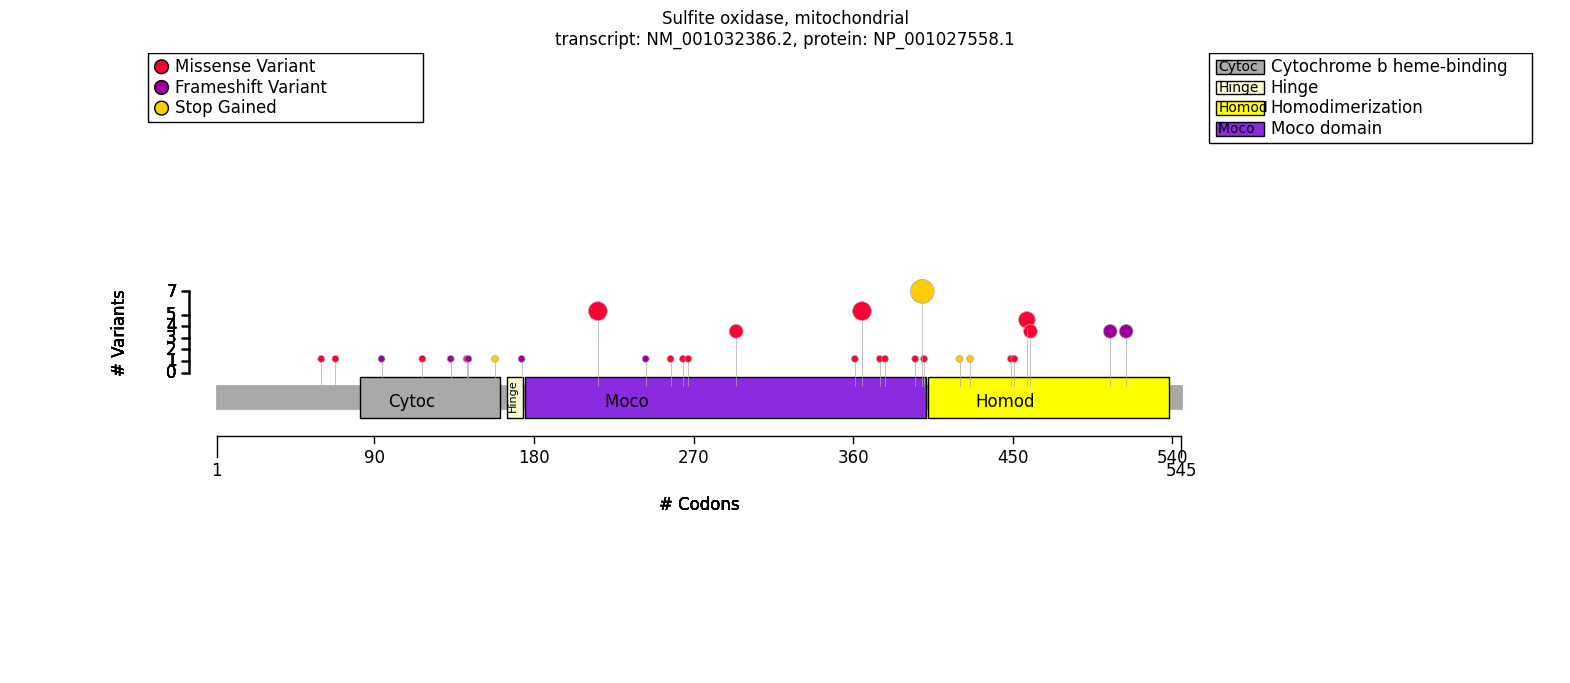

In [6]:
from genophenocorr.view import ProteinVisualizable, ProteinVisualizer

pvis = ProteinVisualizable(tx_coordinates=tx_coordinates, protein_meta=protein_meta, cohort=cohort)
drawer = ProteinVisualizer()
drawer.draw_fig(pvis=pvis)

## Genotype Phenotype Correlation Analysis analysis

In [7]:
from genophenocorr.analysis import configure_cohort_analysis, CohortAnalysisConfiguration

analysis_config = CohortAnalysisConfiguration()
analysis_config.missing_implies_excluded = True
analysis_config.pval_correction = 'fdr_bh'
#analysis_config.heuristic_strategy()
analysis = configure_cohort_analysis(cohort, hpo, config=analysis_config)

## Run the analyses

Compare missense variants vs. other variants.

In [8]:
from genophenocorr.model import VariantEffect
from genophenocorr.analysis.predicate import PatientCategories
from genophenocorr.analysis.predicate.genotype import VariantPredicates

is_missense = VariantPredicates.variant_effect(VariantEffect.MISSENSE_VARIANT, SUOX_transcript_id)
missense = analysis.compare_hpo_vs_recessive_genotype(is_missense)
missense.summarize(hpo, PatientCategories.YES)

MISSENSE_VARIANT on NM_001032386.2                   Both           One  \
                                                    Count Percent Count   
Cognitive regression [HP:0034332]                    6/12     50%   0/5   
Hypotonia [HP:0001252]                              10/11     91%   2/5   
Seizure [HP:0001250]                                12/18     67%   5/6   
Abnormality of extrapyramidal motor function [H...   8/12     67%   1/5   
Neurodevelopmental delay [HP:0012758]                4/12     33%   0/5   
...                                                   ...     ...   ...   
Abnormal muscle physiology [HP:0011804]             11/11    100%   3/3   
Abnormal anterior eye segment morphology [HP:00...    3/3    100%   3/3   
Abnormality of the nervous system [HP:0000707]      17/17    100%   5/5   
Phenotypic abnormality [HP:0000118]                 17/17    100%   6/6   
Abnormal circulating carboxylic acid concentrat...    8/8    100%   2/2   

MISSENSE_VARIANT on NM_001032386.2                         Neither          \
                                                   Percent   Count Percent   
Cognitive regression [HP:0034332]                       0%     0/8      0%   
Hypotonia [HP:0001252]                                 40%     3/7     43%   
Seizure [HP:0001250]                                   83%   11/11    100%   
Abnormality of extrapyramidal motor function [H...     20%     2/8     25%   
Neurodevelopmental delay [HP:0012758]                   0%     4/8     50%   
...                                                    ...     ...     ...   
Abnormal muscle physiology [HP:0011804]               100%     5/5    100%   
Abnormal anterior eye segment morphology [HP:00...    100%     1/1    100%   
Abnormality of the nervous system [HP:0000707]        100%   11/11    100%   
Phenotypic abnormality [HP:0000118]                   100%   11/11    100%   
Abnormal circulating carboxylic acid concentrat...    100%     5/5    100%   

MISSENSE_VARIANT on NM_001032386.2                                              
                                                     p value Corrected p value  
Cognitive regression [HP:0034332]                   0.023343               1.0  
Hypotonia [HP:0001252]                              0.039530               1.0  
Seizure [HP:0001250]                                0.082640               1.0  
Abnormality of extrapyramidal motor function [H...  0.139377               1.0  
Neurodevelopmental delay [HP:0012758]               0.151874               1.0  
...                                                      ...               ...  
Abnormal muscle physiology [HP:0011804]             1.000000               1.0  
Abnormal anterior eye segment morphology [HP:00...  1.000000               1.0  
Abnormality of the nervous system [HP:0000707]      1.000000               1.0  
Phenotypic abnormality [HP:0000118]                 1.000000               1.0  
Abnormal circulating carboxylic acid concentrat...  1.000000               1.0  

[64 rows x 8 columns]

Test for presence of genotype-phenotype correlations between subjects with >=1 allele of a variant vs. the others.

In [9]:
is_variant = VariantPredicates.variant_key('12_56004589_56004589_C_G')

by_variant = analysis.compare_hpo_vs_recessive_genotype(is_variant)
by_variant.summarize(hpo, PatientCategories.YES)

variant has ID of 12_56004589_56004589_C_G          Both           One  \
                                                   Count Percent Count   
Hypotonia [HP:0001252]                               0/1      0%   1/4   
Ectopia lentis [HP:0001083]                          0/1      0%   2/2   
Neurodevelopmental delay [HP:0012758]                0/1      0%   0/5   
Abnormality of extrapyramidal motor function [H...   0/1      0%   1/5   
Cognitive regression [HP:0034332]                    0/1      0%   0/5   
...                                                  ...     ...   ...   
Abnormal muscle physiology [HP:0011804]              1/1    100%   1/1   
Abnormal anterior eye segment morphology [HP:00...   0/0      0%   2/2   
Abnormality of the nervous system [HP:0000707]       2/2    100%   4/4   
Phenotypic abnormality [HP:0000118]                  2/2    100%   5/5   
Abnormal circulating carboxylic acid concentrat...   1/1    100%   2/2   

variant has ID of 12_56004589_56004589_C_G                 Neither          \
                                                   Percent   Count Percent   
Hypotonia [HP:0001252]                                 25%   14/18     78%   
Ectopia lentis [HP:0001083]                           100%    5/15     33%   
Neurodevelopmental delay [HP:0012758]                   0%    8/19     42%   
Abnormality of extrapyramidal motor function [H...     20%   10/19     53%   
Cognitive regression [HP:0034332]                       0%    6/19     32%   
...                                                    ...     ...     ...   
Abnormal muscle physiology [HP:0011804]               100%   17/17    100%   
Abnormal anterior eye segment morphology [HP:00...    100%     5/5    100%   
Abnormality of the nervous system [HP:0000707]        100%   27/27    100%   
Phenotypic abnormality [HP:0000118]                   100%   27/27    100%   
Abnormal circulating carboxylic acid concentrat...    100%   12/12    100%   

variant has ID of 12_56004589_56004589_C_G                                      
                                                     p value Corrected p value  
Hypotonia [HP:0001252]                              0.032869               1.0  
Ectopia lentis [HP:0001083]                         0.137255               1.0  
Neurodevelopmental delay [HP:0012758]               0.175758               1.0  
Abnormality of extrapyramidal motor function [H...  0.340580               1.0  
Cognitive regression [HP:0034332]                   0.452851               1.0  
...                                                      ...               ...  
Abnormal muscle physiology [HP:0011804]             1.000000               1.0  
Abnormal anterior eye segment morphology [HP:00...  1.000000               1.0  
Abnormality of the nervous system [HP:0000707]      1.000000               1.0  
Phenotypic abnormality [HP:0000118]                 1.000000               1.0  
Abnormal circulating carboxylic acid concentrat...  1.000000               1.0  

[64 rows x 8 columns]

TODO - finalize!